# *RECONOCIMIENTO FACIAL*

 Implementamos  un sistema utilizando Deep learning que mediante una cámara detecte en tiempo real  si un empleado tiene acceso o no. Para ello recopilamos imagenes de los rostros de los empleados. Utilizando el conjunto de datos recopilados podemos calcular la similitud con la imagen en tiempo real captada por la webcam.


### 1.- Exploración de Datos

In [ ]:
# Lectura de imágenes
#Con estos módulos importados, se puede cargar, manipular y visualizar imágenes en Python.
## ==============================================================================
from PIL import Image  
import cv2
import matplotlib.pyplot as plt


imagen_1 = Image.open('C:/Users/Mayra/PROYF5/Reconocimientofacial/Recofacial/EQUIPO_5_RF/Images/Foto1.jpg')
imagen_2 = Image.open('C:/Users/Mayra/PROYF5/Reconocimientofacial/Recofacial/EQUIPO_5_RF/Images/Foto_grupal.jpg')
imagen_3 = Image.open('C:/Users/Mayra/PROYF5/Reconocimientofacial/Recofacial/EQUIPO_5_RF/Images/Foto_grupal_2.jpg')
imagen_4 = Image.open('C:/Users/Mayra/PROYF5/Reconocimientofacial/Recofacial/EQUIPO_5_RF/Images/mayra.jpg')
imagen_5 = Image.open('C:/Users/Mayra/PROYF5/Reconocimientofacial/Recofacial/EQUIPO_5_RF/Images/andrea.png')
imagen_6 = Image.open('C:/Users/Mayra/PROYF5/Reconocimientofacial/Recofacial/EQUIPO_5_RF/Images/reco_1.jpg')


# Representación de imágenes
# Crea una figura con una imagen y desactivan los ejes en la figura, permitiendo  visualizar la imagen sin distracciones.
# ==============================================================================
plt.figure(figsize=(5, 4))
plt.imshow(imagen_1)
plt.axis('off');

plt.figure(figsize=(10, 6))
plt.imshow(imagen_2)
plt.axis('off');
plt.figure(figsize=(10, 6))
plt.imshow(imagen_3)
plt.axis('off');

plt.figure(figsize=(10, 6))
plt.imshow(imagen_4)
plt.axis('off');

plt.figure(figsize=(10, 6))
plt.imshow(imagen_5)
plt.axis('off');

plt.figure(figsize=(10, 6))
plt.imshow(imagen_6)
plt.axis('off');


### 2.- DETECTOR DE CARAS MTCNN

- MTCNN es una red neuronal de tipo "cascada" que combina tareas de detección de caras, localización de puntos de referencia y extracción de características faciales en una sola red neuronal, funciona dividiendo la tarea de detección de caras en tres fases.

In [ ]:
# Importamos los módulos, para crear y entrenar redes neuronales con PyTorch, detectar caras en imágenes utilizando MTCNN,
# manipular arrays y matrices con Numpy.
import torch
from facenet_pytorch import MTCNN
import numpy as np

# Detectar si se dispone de GPU cuda
# el módulo "torch" para crear un objeto device 
# ==============================================================================
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

# Detector MTCNN
#"MTCNN" es parte de la biblioteca "facenet_pytorch" y se utiliza para detectar caras en imágenes.
# ==============================================================================
mtcnn = MTCNN(
            select_largest = True,  
            min_face_size  = 20,
            thresholds     = [0.6, 0.7, 0.7],
            post_process   = False,
            image_size     = 160,
            device         = device
        )

In [ ]:
# Representación con matplotlib
box = boxes[0]
landmark = landmarks[0]
fig, ax  = plt.subplots(figsize=(5, 4))
ax.imshow(imagen_4)
ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
rect = plt.Rectangle(
            xy     = (box[0], box[1]),
            width  = box[2] - box[0],
            height = box[3] - box[1],
            fill   = False,
            color  = 'red'
       )
ax.add_patch(rect)
ax.axis('off');

- En punto de origen (0,0) de una imagen es la esquina superior izquierda. Está creando una figura de matplotlib que muestra una imagen y superpone información sobre la cara detectada en ella. 
La primera línea "box = boxes[0]" selecciona el primer resultado de detección de cara en la lista "boxes". 
La línea "landmark = landmarks[0]" hace lo mismo con la lista de puntos de referencia faciales. Luego, se crea una figura de matplotlib con "fig, ax = plt.subplots(figsize=(5, 4))" . "y" se muestra en la imagen con "ax.imshow(imagen_4)". 

- A continuación, se utiliza el comando "ax.scatter" para trazar los puntos de referencia faciales en la imagen con pequeños puntos rojos. Finalmente, se crea un rectángulo rojo con "rect = plt.Rectangle" para indicar la ubicación de la cara detectada en la imagen.Este rectángulo se añade a la figura con "ax.add_patch(rect)" y se desactiva el eje de coordenadas con "ax.axis('off')".

In [ ]:
# Detección de bounding box y landmarks
# ==============================================================================
# el detector de caras MTCNN para detectar caras en una imagen (imagen_3) y obtener información sobre ellas. 
# La función devuelve tres listas: "boxes", "probs" y "landmarks". 
boxes, probs, landmarks = mtcnn.detect(imagen_3, landmarks=True)

# Representación con matplotlib
# ==============================================================================
# Está creando un gráfico de matplotlib y dibujando la imagen (imagen_3) en él. También está 
# recorriendo las caras detectadas en la imagen y marcando cada una con una caja delimitadora 
# y puntos de referencia faciales. Cada punto de referencia facial se representa como un pequeño 
# punto rojo y se ubica en la posición correspondiente en la imagen. 
# La caja delimitadora se dibuja como un rectángulo rojo que envuelve cada cara detectada.
# Finalmente, se apaga el eje para una visualización más limpia.
fig, ax = plt.subplots(figsize=(12, 7))
ax.imshow(imagen_3)

for box, landmark in zip(boxes, landmarks):
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8, c= 'red')
    rect = plt.Rectangle(
                xy     = (box[0], box[1]),
                width  = box[2] - box[0],
                height = box[3] - box[1],
                fill   = False,
                color  = 'red'
           )
    ax.add_patch(rect)

ax.axis('off');


In [ ]:
# Detección de cara
# ==============================================================================
# La imagen devuelta por el detector es un tensor con dimensiones [3, 160, 160]
# [canales color, altura, anchura]
# canales color ---> 3 ---> RGB
# La función devuelve un tensor con los valores normalizados de cada punto facial detectado.
# Estos valores se almacenan en la variable "face".
face = mtcnn.forward(imagen_2)

# Representación con matplotlib
# Cre un gráfico de matplotlib con una sola imagen y dibujando la representación normalizada de la cara extraída (face) en ella.
# La representación normalizada se permuta y convierte a un formato numpy antes de ser dibujada. 
# Finalmente, se apaga el eje para una visualización más limpia.
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
face = face.permute(1, 2, 0).int().numpy()
ax.imshow(face)
plt.axis('off');

In [ ]:
# Detector MTCNN
# creando una nueva instancia del detector de caras MTCNN con diferentes opciones de configuración. Las opciones incluyen:
#keep_all: indica que se deben mantener todas las caras detectadas en la imagen, no solo la más grande.
#min_face_size: especifica el tamaño mínimo de la cara que se debe detectar.
#thresholds: especifica los umbrales de probabilidad para considerar una region como una cara.
#post_process: indica si se deben realizar procesos adicionales después de la detección.
#image_size: especifica el tamaño de la imagen a utilizar para la detección.
#device: especifica el dispositivo de hardware que se debe utilizar para la detección (GPU o CPU).
# ==============================================================================
mtcnn = MTCNN(
            keep_all      = True,
            min_face_size = 20,
            thresholds    = [0.6, 0.7, 0.7],
            post_process  = False,
            image_size    = 160,
            device        = device
        )

# Detección de caras
# ==============================================================================
faces = mtcnn.forward(imagen_2)

In [ ]:
# Las dimensiones del tensor generado son [nº caras, canales color, altura, anchura].

faces.shape

- Se estan identificando 13 rostros en la imagen, en tres canales de color diferentes.

### 4.- Extraer rostros

In [ ]:
# Representación con matplotlib de los rostros extraidos en la imagen.
fig, axs = plt.subplots(nrows=2, ncols=6, figsize=(20, 6))
axs= axs.flatten()

for i in range(faces.shape[0]):
    face = faces[i,:,:,:].permute(1, 2, 0).int().numpy()
    axs[i].imshow(face)
    axs[i].axis('off')
    
plt.tight_layout();

In [ ]:
# Extracción de cara a partir de una bounding box
boxes, probs, landmarks = mtcnn.detect(imagen_4, landmarks=True)
x1, y1, x2, y2 = boxes[0].astype(int)
recorte_cara = np.array(imagen_4)[y1:y2, x1:x2]

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
plt.imshow(recorte_cara)
plt.axis('off');

### 5.- EMBEDDING DE ROSTROS

- Es el proceso de convertir una imágen en un vector, que ayuda en la clasificación de imagenes, detección, comparación y busquedas de imagenes similares.  Se ulitiza con las redes neuronales que se entrenan a partir de un conjunto de imagenes previamente etiquetadas; ya que utiliza un conjunto de imagenes etiquetas; ya que aprende a extraer caracteristicas únicas de cada imagen y las representa en un vector único para cada una.
Estos vectores se pueden comparar mediante algoritmos de distancia, como la distancia euclidiana o la distancia coseno, para realizar tareas como la clasificación y la búsqueda de imágenes similares.

In [ ]:
# Se utiliza facenet_pytorch para el embedding
from facenet_pytorch import InceptionResnetV1
encoder = InceptionResnetV1(pretrained='vggface2', classify=False, device=device).eval()

In [ ]:
# Detección de cara
cara = mtcnn(imagen_4)

In [ ]:
# Embedding de rostro de la imagen anterior
embedding_cara = encoder.forward(cara.reshape((1,3, 160, 160))).detach().cpu()
embedding_cara

### 6.- SIMILITUD ENTRE ROSTROS

In [ ]:
# Extracción de las caras con MTCNN de las siguientes imagenes
PRUEBA_2 = mtcnn(imagen_4)[0]
PRUEBA_1= mtcnn(imagen_1)[2]
RECO = mtcnn(imagen_1)[1]

In [ ]:
# Representación con matplotlib de los rostros
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))

face = PRUEBA_2.permute(1, 2, 0).int().numpy()
axs[0].imshow(face)
axs[0].set_title('MAYRA 1')
axs[0].axis('off')

face = PRUEBA_1.permute(1, 2, 0).int().numpy()
axs[1].imshow(face)
axs[1].set_title('MAYRA 2')
axs[1].axis('off')

face = RECO.permute(1, 2, 0).int().numpy()
axs[2].imshow(face)
axs[2].set_title('CHEN')
axs[2].axis('off');

In [ ]:
# Embeddings de cada rostro extraído
embeding_PRUEBA_2 = encoder.forward(PRUEBA_2.reshape((1,3, 160, 160))).detach().cpu()
embeding_PRUEBA_1 = encoder.forward(PRUEBA_1.reshape((1,3, 160, 160))).detach().cpu()
embeding_RECO = encoder.forward(RECO.reshape((1,3, 160, 160))).detach().cpu()

In [ ]:
# Distancias euclidianas entre embeddings de rostros, se utiliza la libreria euclidean_distances de sklearn
from sklearn.metrics.pairwise import euclidean_distances
print(f"Distancia entre la misma imagen MAYRA: {euclidean_distances(embeding_PRUEBA_2, embeding_PRUEBA_2)}")
print(f"Distancia entre las dos imágenes de MAYRA: {euclidean_distances(embeding_PRUEBA_2, embeding_PRUEBA_1)}")
print(f"Distancia entre MAYRA y CHEN: {euclidean_distances(embeding_PRUEBA_2, embeding_RECO)}")

- Cuanto menor sea el resultado del calculo de la distancia euclidiana mayor será el porcentaje de éxito en la comparación de similitudes.

## Entrenando modelo 

In [1]:

# Se importan las librerías necesarias
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import warnings
import typing
import logging
import os
import platform
import glob
import PIL
import facenet_pytorch
from typing import Union, Dict
from PIL import Image
from facenet_pytorch import MTCNN
from facenet_pytorch import InceptionResnetV1
from tqdm import tqdm 
#Libreria para calcular la distancia entre embeddings
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances
from scipy.spatial.distance import cosine
#Se ignoran mensajes de error
warnings.filterwarnings('ignore')

logging.basicConfig(
    format = '%(asctime)-5s %(name)-10s %(levelname)-5s %(message)s', 
    level  = logging.WARNING,
)


### 1. *Funciones para la detección, extracción, embedding, identificación y gráficos*


In [2]:
# Funcion para detectar rostro
def detectar_caras(imagen: Union[PIL.Image.Image, np.ndarray],
                   detector: facenet_pytorch.models.mtcnn.MTCNN=None,
                   keep_all: bool        = True,
                   min_face_size: int    = 20,
                   thresholds: list      = [0.6, 0.7, 0.7],
                   device: str           = None,
                   min_confidence: float = 0.5, # Valor minimo de similitud entre rostros
                   fix_bbox: bool        = True,
                   verbose               = False)-> np.ndarray:
                  

    # Comprobaciones iniciales
    if not isinstance(imagen, (np.ndarray, PIL.Image.Image)):
        raise Exception(
            f"`imagen` debe ser `np.ndarray, PIL.Image`. Recibido {type(imagen)}."
        )

    if detector is None:
        logging.info('Iniciando detector MTCCN')
        detector = MTCNN(
                        keep_all      = keep_all,
                        min_face_size = min_face_size,
                        thresholds    = thresholds,
                        post_process  = False,
                        device        = device
                   )
        
    # Detección de caras
    if isinstance(imagen, PIL.Image.Image):
        imagen = np.array(imagen).astype(np.float32)
        
    bboxes, probs = detector.detect(imagen, landmarks=False)
    
    if bboxes is None:
        bboxes = np.array([])
        probs  = np.array([])
    else:
        # Se descartan caras con una probabilidad estimada inferior a `min_confidence`.
        bboxes = bboxes[probs > min_confidence]
        probs  = probs[probs > min_confidence]
        
    logging.info(f'Número total de caras detectadas: {len(bboxes)}')
    logging.info(f'Número final de caras seleccionadas: {len(bboxes)}')



    # Se configura bounding boxes
    if len(bboxes) > 0 and fix_bbox:       
        for i, bbox in enumerate(bboxes):
            if bbox[0] < 0:
                bboxes[i][0] = 0
            if bbox[1] < 0:
                bboxes[i][1] = 0
            if bbox[2] > imagen.shape[1]:
                bboxes[i][2] = imagen.shape[1]
            if bbox[3] > imagen.shape[0]:
                bboxes[i][3] = imagen.shape[0]
                

    # Información de proceso
    # ----------------------------------------------------------------------
    if verbose:
        print("----------------")
        print("Imagen escaneada")
        print("----------------")
        print(f"Caras detectadas: {len(bboxes)}")
        print(f"Correción bounding boxes: {fix_bbox}")
        print(f"Coordenadas bounding boxes: {bboxes}")
        print(f"Confianza bounding boxes:{probs} ")
        print("")
        
    return bboxes.astype(int)

In [3]:
#Funcion mostrar boxes
def mostrar_bboxes(imagen: Union[PIL.Image.Image, np.ndarray],
                   bboxes: np.ndarray,
                   identidades: list=None,
                   ax=None ) -> None:

    # Comprobaciones iniciales
    if not isinstance(imagen, (np.ndarray, PIL.Image.Image)):
        raise Exception(
            f"`imagen` debe ser `np.ndarray, PIL.Image`. Recibido {type(imagen)}."
        )
        
    if identidades is not None:
        if len(bboxes) != len(identidades):
            raise Exception(
                '`identidades` debe tener el mismo número de elementos que `bboxes`.'
            )
    else:
        identidades = [None] * len(bboxes)

    # Mostrar la imagen y superponer bounding boxes
    if ax is None:
        ax = plt.gca()
        
    if isinstance(imagen, PIL.Image.Image):
        imagen = np.array(imagen).astype(np.float32) / 255
        
    ax.imshow(imagen)
    ax.axis('off')
    
    if len(bboxes) > 0:
        
        #Se configura color de bounding boxes
        for i, bbox in enumerate(bboxes):
            if identidades[i] is not None:
                rect = plt.Rectangle(
                            xy        = (bbox[0], bbox[1]),
                            width     = bbox[2] - bbox[0],
                            height    = bbox[3] - bbox[1],
                            linewidth = 1,
                            edgecolor = 'lime', #En caso de acceso permitido
                            facecolor = 'none'
                        )
                
                ax.add_patch(rect)
                
                ax.text(
                    x = bbox[0],
                    y = bbox[1] -10,
                    s = identidades[i],
                    fontsize = 10,
                    color    = 'lime'
                )
            else:
                rect = plt.Rectangle(
                            xy        = (bbox[0], bbox[1]),
                            width     = bbox[2] - bbox[0],
                            height    = bbox[3] - bbox[1],
                            linewidth = 1,
                            edgecolor = 'red', #En caso de no tener acceso
                            facecolor = 'none'
                        )
                
                ax.add_patch(rect)
                
        plt.show()
        

In [4]:
#Funcion mostrar boxes con OpenCV

def mostrar_bboxes_cv2(imagen: Union[PIL.Image.Image, np.ndarray],
                       bboxes: np.ndarray,
                       identidades: list=None,
                       device: str='window') -> None:
    # Comprobaciones iniciales
    if not isinstance(imagen, (np.ndarray, PIL.Image.Image)):
        raise Exception(
            f"`imagen` debe ser `np.ndarray`, `PIL.Image`. Recibido {type(imagen)}."
        )
        
    if identidades is not None:
        if len(bboxes) != len(identidades):
            raise Exception(
                '`identidades` debe tener el mismo número de elementos que `bboxes`.'
            )
    else:
        identidades = [None] * len(bboxes)

    # Mostrar la imagen y superponer bounding boxes
    if isinstance(imagen, PIL.Image.Image):
        imagen = np.array(imagen).astype(np.float32) / 255
    
    if len(bboxes) > 0:
        
        for i, bbox in enumerate(bboxes):
            
            if identidades[i] is not None:
                cv2.rectangle(
                    img       = imagen,
                    pt1       = (bbox[0], bbox[1]),
                    pt2       = (bbox[2], bbox[3]),
                    color     = (0, 255, 0),
                    thickness = 2
                )
                
                #De tener acceso se podrá obsrvar el nombre de la persona
                cv2.putText(
                    img       = imagen, 
                    text      = identidades[i], 
                    org       = (bbox[0], bbox[1]-10), 
                    fontFace  = cv2.FONT_HERSHEY_SIMPLEX, 
                    fontScale = 1e-3 * imagen.shape[0],
                    color     = (0,255,0),
                    thickness = 2
                )
            else:
                #En caso contrario, se observará su rostro en un recuadro rojo
                cv2.rectangle(
                    img       = imagen,
                    pt1       = (bbox[0], bbox[1]),
                    pt2       = (bbox[2], bbox[3]),
                    color     = (255, 0, 0),
                    thickness = 2
                )
        
    if device is None:
        return imagen
    else:
        cv2.imshow(device, cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
        if cv2.waitKey(1) == 27: 
            brcv2.destroyAllWindows()  # esc para cerrar la ventana                      

In [5]:
#Funciones para extraer caras
def extraer_caras(imagen: Union[PIL.Image.Image, np.ndarray],
                  bboxes: np.ndarray,
                  output_img_size: Union[list, tuple, np.ndarray]=[160, 160]) -> None:

    # Comprobaciones iniciales
    if not isinstance(imagen, (np.ndarray, PIL.Image.Image)):
        raise Exception(
            f"`imagen` debe ser np.ndarray, PIL.Image. Recibido {type(imagen)}."
        )
        
    # Recorte de cara
    if isinstance(imagen, PIL.Image.Image):
        imagen = np.array(imagen)
        
    if len(bboxes) > 0:
        caras = []
        for bbox in bboxes:
            x1, y1, x2, y2 = bbox
            cara = imagen[y1:y2, x1:x2]
            # Redimensionamiento del recorte
            cara = Image.fromarray(cara)
            cara = cara.resize(tuple(output_img_size))
            cara = np.array(cara)
            caras.append(cara)
            
    caras = np.stack(caras, axis=0)

    return caras   


#Función de calculo de embeddings
def calcular_embeddings(img_caras: np.ndarray, encoder=None,
                        device: str=None) -> np.ndarray:        

    # Comprobaciones iniciales
    if not isinstance(img_caras, np.ndarray):
        raise Exception(
            f"`img_caras` debe ser np.ndarray {type(img_caras)}."
        )
        
    if img_caras.ndim != 4:
        raise Exception(
            f"`img_caras` debe ser np.ndarray con dimensiones [nº caras, ancho, alto, 3]."
            f" Recibido {img_caras.ndim}."
        )
    
    #Se carga red neuronal para calcular el embedding de cada imagen
    if encoder is None:
        logging.info('Iniciando encoder InceptionResnetV1')
        encoder = InceptionResnetV1(
                        pretrained = 'vggface2',
                        classify   = False,
                        device     = device
                   ).eval()
        
    # Calculo de embedings
    # El InceptionResnetV1 modelo requiere que las dimensiones de entrada sean [nº caras, 3, ancho, alto]
    caras = np.moveaxis(img_caras, -1,1)
    caras = caras.astype(np.float32) / 255
    caras = torch.tensor(caras)
    embeddings = encoder.forward(caras).detach().cpu().numpy()
    embeddings = embeddings
    return embeddings



#Función para identificar rostros
def identificar_caras(embeddings: np.ndarray,
                      dic_referencia: dict,
                      threshold_similaridad: float = 0.6) -> list: #Se calcula de acuerdo a la similitud de imagenes
    identidades = []
        
    for i in range(embeddings.shape[0]):
        # Se calcula la similitud con cada uno de los perfiles de referencia.
        similitudes = {}
        for key, value in dic_referencia.items():
            
            similitudes[key] = 1 - cosine(embeddings[i], value[0]) #Calculo de coseno para similaridad
        
        # Se identifica la persona de mayor similitud.
        identidad = max(similitudes, key=similitudes.get)
        # Si la similitud < threshold_similaridad, se etiqueta como None
        if similitudes[identidad] < threshold_similaridad:
            identidad = None
            
        identidades.append(identidad)
        
    return identidades


#Se crea las carpetas como diccionarios de referencias.
def crear_diccionario_referencias(folder_path:str,
                                  dic_referencia:dict=None,
                                  detector: facenet_pytorch.models.mtcnn.MTCNN=None,
                                  min_face_size: int=40,
                                  thresholds: list=[0.6, 0.7, 0.7],
                                  min_confidence: float=0.9,
                                  encoder=None,
                                  device: str=None,
                                  verbose: bool=False)-> dict:

    # Comprobaciones iniciales
    if not os.path.isdir(folder_path):
        raise Exception(
            f"Directorio {folder_path} no existe."
        )
        
    if len(os.listdir(folder_path) ) == 0:
        raise Exception(
            f"Directorio {folder_path} está vacío."
        )
    
    
    if detector is None:
        logging.info('Iniciando detector MTCC')
        detector = MTCNN(
                        keep_all      = False,
                        post_process  = False,
                        min_face_size = min_face_size,
                        thresholds    = thresholds,
                        device        = device
                   )
    
    if encoder is None:
        logging.info('Iniciando encoder InceptionResnetV1')
        encoder = InceptionResnetV1(
                        pretrained = 'vggface2',
                        classify   = False,
                        device     = device
                   ).eval()
        
    
    new_dic_referencia = {}
    folders = glob.glob(folder_path + "/*")
    
    for folder in folders:
        
        if platform.system() in ['Linux', 'Darwin']:
            identidad = folder.split("/")[-1]
        else:
            identidad = folder.split("\\")[-1]
                                     
        logging.info(f'Obteniendo embeddings de: {identidad}')
        embeddings = []
        # Se lista todas las imagenes .jpg .jpeg .tif .png
        path_imagenes = glob.glob(folder + "/*.jpg")
        path_imagenes.extend(glob.glob(folder + "/*.jpeg"))
        path_imagenes.extend(glob.glob(folder + "/*.tif"))
        path_imagenes.extend(glob.glob(folder + "/*.png"))
        logging.info(f'Total imagenes referencia: {len(path_imagenes)}')
        
        for path_imagen in path_imagenes:
            logging.info(f'Leyendo imagen: {path_imagen}')
            imagen = Image.open(path_imagen)
            # Si la imagen es RGBA se pasa a RGB
            if np.array(imagen).shape[2] == 4:
                imagen  = np.array(imagen)[:, :, :3]
                imagen  = Image.fromarray(imagen)
                
            bbox = detectar_caras(
                        imagen,
                        detector       = detector,
                        min_confidence = min_confidence,
                        verbose        = False
                    )
            
            if len(bbox) > 1:
                logging.warning(
                    f'Más de 2 caras detectadas en la imagen: {path_imagen}. '
                    f'Se descarta la imagen del diccionario de referencia.'
                )
                continue
                
            if len(bbox) == 0:
                logging.warning(
                    f'No se han detectado caras en la imagen: {path_imagen}.'
                )
                continue
                
            cara = extraer_caras(imagen, bbox)
            embedding = calcular_embeddings(cara, encoder=encoder)
            embeddings.append(embedding)
        
        if verbose:
            print(f"Identidad: {identidad} --- Imágenes referencia: {len(embeddings)}")
            
        embedding_promedio = np.array(embeddings).mean(axis = 0)
        new_dic_referencia[identidad] = embedding_promedio
        
    if dic_referencia is not None:
        dic_referencia.update(new_dic_referencia)
        return dic_referencia
    else:
        return new_dic_referencia


In [6]:
#Función para cargar el reconocimiento en imagenes
def pipeline_deteccion_imagen(imagen: Union[PIL.Image.Image, np.ndarray],
                              dic_referencia:dict,
                              detector: facenet_pytorch.models.mtcnn.MTCNN=None,
                              keep_all: bool=True,
                              min_face_size: int=20,
                              thresholds: list=[0.6, 0.7, 0.7],
                              device: str=None,
                              min_confidence: float=0.5,
                              fix_bbox: bool=True,
                              output_img_size: Union[list, tuple, np.ndarray]=[160, 160],
                              encoder=None,
                              threshold_similaridad: float=0.5,
                              ax=None,
                              verbose=False)-> None:
    
    #Se carga boungding box
    bboxes = detectar_caras(
                imagen         = imagen,
                detector       = detector,
                keep_all       = keep_all,
                min_face_size  = min_face_size,
                thresholds     = thresholds,
                device         = device,
                min_confidence = min_confidence,
                fix_bbox       = fix_bbox
              )
    
    if len(bboxes) == 0:
        
        logging.info('No se han detectado caras en la imagen.')
        mostrar_bboxes(
            imagen      = imagen,
            bboxes      = bboxes,
            ax          = ax
        )
        
    else:
    
        caras = extraer_caras(
                    imagen = imagen,
                    bboxes = bboxes
                )

        embeddings = calcular_embeddings(
                        img_caras = caras,
                        encoder   = encoder
                     )

        identidades = identificar_caras(
                         embeddings     = embeddings,
                         dic_referencia = dic_referencia,
                         threshold_similaridad = threshold_similaridad
                       )

        mostrar_bboxes(
            imagen      = imagen,
            bboxes      = bboxes,
            identidades = identidades,
            ax          = ax
        )                      

In [7]:
#Función para cargar el reconocimiento en imagenes
def pipeline_deteccion_webcam(dic_referencia: dict,
                             output_device: str = 'window',
                             path_output_video: str=os.getcwd(),
                             detector: facenet_pytorch.models.mtcnn.MTCNN=None,
                             keep_all: bool=True,
                             min_face_size: int=40,
                             thresholds: list=[0.6, 0.7, 0.7],
                             device: str=None,
                             min_confidence: float=0.5,
                             fix_bbox: bool=True,
                             output_img_size: Union[list, tuple, np.ndarray]=[160, 160],
                             encoder=None,
                             threshold_similaridad: float=0.5,
                             ax=None,
                             verbose=False)-> None:
    

    capture = cv2.VideoCapture(0)
    frame_exist = True

    while(frame_exist):
        frame_exist, frame = capture.read()

        if not frame_exist:
            capture.release()
            cv2.destroyAllWindows()
            break

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        bboxes = detectar_caras(
                        imagen         = frame,
                        detector       = detector,
                        keep_all       = keep_all,
                        min_face_size  = min_face_size,
                        thresholds     = thresholds,
                        device         = device,
                        min_confidence = min_confidence,
                        fix_bbox       = fix_bbox
                      )

        if len(bboxes) == 0:

            logging.info('No se han detectado caras en la imagen.')
            cv2.imshow(output_device, cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
                             
        else:

            caras = extraer_caras(
                        imagen = frame,
                        bboxes = bboxes
                    )

            embeddings = calcular_embeddings(
                            img_caras = caras,
                            encoder   = encoder
                         )

            identidades = identificar_caras(
                             embeddings     = embeddings,
                             dic_referencia = dic_referencia,
                             threshold_similaridad = threshold_similaridad
                          )

            frame_procesado = mostrar_bboxes_cv2(
                                imagen      = frame,
                                bboxes      = bboxes,
                                identidades = identidades,
                                device = output_device
                             )
            
        if cv2.waitKey(1) == 27: 
            break  # esc para cerrar la ventana

    capture.release()
    cv2.destroyAllWindows()

In [8]:
#Cargamos los diccionario de referencia. Cada carpeta con el nombre de la persona con acceso.
#Detectar si se dispone de GPU cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(F'Running on device: {device}')

# Crear diccionario de referencia para cada persona
dic_referencia = crear_diccionario_referencias(
                    folder_path    = '/sysroot/home/andreasandoval/Documentos/BOOTCAMP_F5/RecoFacial/EQUIPO_5_RF/Images/referencia',
                    min_face_size  = 40,
                    min_confidence = 0.9,
                    device         = device,
                    verbose        = True
                  )


Running on device: cpu
Identidad: Henry --- Imágenes referencia: 3
Identidad: Alexandra --- Imágenes referencia: 6
Identidad: Felix --- Imágenes referencia: 2
Identidad: Andrea --- Imágenes referencia: 3
Identidad: David --- Imágenes referencia: 4
Identidad: Chen --- Imágenes referencia: 2
Identidad: Vaneza --- Imágenes referencia: 2
Identidad: Steph --- Imágenes referencia: 2
Identidad: Begoña --- Imágenes referencia: 3
Identidad: Mayra --- Imágenes referencia: 4
Identidad: Jonnathan --- Imágenes referencia: 3
Identidad: Anghi --- Imágenes referencia: 3
Identidad: Raul --- Imágenes referencia: 2
Identidad: Ana --- Imágenes referencia: 4
Identidad: Pablo --- Imágenes referencia: 4
Identidad: Javi --- Imágenes referencia: 2
Identidad: Rebeca --- Imágenes referencia: 3
Identidad: Sebastian --- Imágenes referencia: 3
Identidad: Nayare --- Imágenes referencia: 3
Identidad: Celeste --- Imágenes referencia: 3


### 2. *Reconocimiento en imagenes*

Running on device: cpu


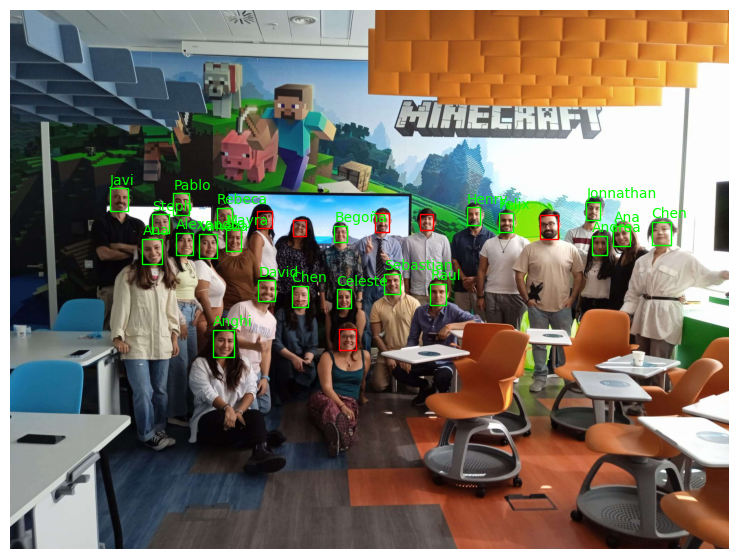

In [9]:
# Reconocimiento en imágenes
# Detectar si se dispone de GPU cuda
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(F'Running on device: {device}')

# Identificar las personas en la imagen
fig, ax = plt.subplots(figsize=(12, 7))
imagen = Image.open('/sysroot/home/andreasandoval/Documentos/BOOTCAMP_F5/RecoFacial/EQUIPO_5_RF/Images/Foto_grupal_2.jpg')

pipeline_deteccion_imagen(
    imagen = imagen,
    dic_referencia        = dic_referencia,
    min_face_size         = 20,
    thresholds            = [0.6, 0.7, 0.7],
    min_confidence        = 0.5,
    threshold_similaridad = 0.5,
    device                = device,
    ax                    = ax,
    verbose               = False
)

### 3. *Reconocimiento por webcam*

In [ ]:
# Reconocimiento por webcam
pipeline_deteccion_webcam(
     dic_referencia        = dic_referencia,
     threshold_similaridad = 0.6,
)